In [84]:
## Importing packages
#Pandas for the dataframe
import pandas as pd

# Matplotlib for Data visualisations
import matplotlib.pyplot as plt 

# Import Seaborn for a more sophisticated visualistaions 
import seaborn as sns 
# Import numpy 
import numpy as np 

In [123]:
# Reading the data
               ## For France's BOP quraterly data, from FRED
france_bop_qurarterly_fred= pd.read_csv('sourcecode/FRED_bop_france_quarterly.csv', index_col=0)

### Rename the data column
france_bop_qurarterly_fred.columns= [ 'Quarterly BOP (in ? billions)']
               ## France's GDP, quarterly, from FRED
france_gdp_quarterly_fred= pd.read_csv('sourcecode\FRED_euros_france_gdp_quarterly.csv', index_col=0)
###  Renaming the data coloumn
france_gdp_quarterly_fred.columns= ['Quarterly GDP (in € Millions)']

                ## France's quarteerly investments data, in euros, from FRED

france_investments_quarterly_fred= pd.read_csv('sourcecode\FRED_euros_investments_quarterly.csv', index_col=0)
 ### Renaming
france_investments_quarterly_fred.columns= ['Quarterly investments ( in € Millions??)']

                 ## Exchange rate US/EUR
us_eur_quarterly_fred = pd.read_csv('sourcecode\FRED_exchage_rate_quarterly.csv', index_col=0)
### Rename
us_eur_quarterly_fred.columns= ['$/€ Quarterly']
### Reverse currency exchange

eur_us_quarterly_fred= 1/ us_eur_quarterly_fred
eur_us_quarterly_fred.columns= ['€/$ Quarterly']


                 ## France's  annual goverment debt, from OECD
gov_debt_annual_oecd= pd.read_csv('sourcecode\OECD_gov_debt_annual.csv')
### Selecting france and deleting,  renamning , and indexing  some columns
france_gov_debt_annual_oecd = gov_debt_annual_oecd[ gov_debt_annual_oecd['LOCATION']=='FRA']
france_gov_debt_annual_oecd= france_gov_debt_annual_oecd.loc[:, [ 'TIME', 'Value']]
france_gov_debt_annual_oecd.columns= ['Year', 'Annual goverment debt (% of GDP)']

france_gov_debt_annual_oecd= france_gov_debt_annual_oecd.set_index('Year')


                ## France Annual interest rates, OECD
france_interest_rates_annual_oecd= pd.read_csv('sourcecode\OECD_interest_rates_annual.csv')
### Removing,  renaming, and indexing columns
france_interest_rates_annual_oecd =  france_interest_rates_annual_oecd.loc[:, ['TIME', 'Value']]
france_interest_rates_annual_oecd.columns= ['Year', 'Annual Long Term Interest Rates ( in % )']
france_interest_rates_annual_oecd= france_interest_rates_annual_oecd.set_index('Year')



                ## Frnace Quarterly interest rates, OECD
france_interest_rates_quarterly_oecd= pd.read_csv('sourcecode\OECD_interest_rates_france_quarterly.csv')
### Removing,  renaming, and indexing columns
france_interest_rates_quarterly_oecd =  france_interest_rates_quarterly_oecd.loc[:, ['TIME', 'Value']]
france_interest_rates_quarterly_oecd.columns= ['Year', 'Quarterly Long Term Interest Rates ( in % )']
france_interest_rates_quarterly_oecd= france_interest_rates_quarterly_oecd.set_index('Year')

                ## France annual savings rate, OECD
france_savings_rate_annual_oecd = pd.read_csv('sourcecode\OECD_savings_rate_annual.csv')
france_savings_rate_annual_oecd = france_savings_rate_annual_oecd[ france_savings_rate_annual_oecd['LOCATION']=='FRA']
### Removing,  renaming, and indexing columns
france_savings_rate_annual_oecd =  france_savings_rate_annual_oecd.loc[:, ['TIME', 'Value']]
france_savings_rate_annual_oecd.columns= ['Year', 'Annual Savings rate ( %  GDP)']
france_savings_rate_annual_oecd= france_savings_rate_annual_oecd.set_index('Year')

##I could not read the gross savings data
It appears this code: *ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 66*

In [ ]:
# France's annual Gross saving
france_gross_saving_annual_wb =  pd.read_csv('sourcecode\WorldBank_GrossSavings_annual.csv',header=None)

In [ ]:
# A clear view of the dataframes
##They are cleaned, with date as their index
# Quarterly
france_bop_qurarterly_fred

france_gdp_quarterly_fred

france_investments_quarterly_fred

eur_us_quarterly_fred
france_interest_rates_quarterly_oecd
# Annual
gov_debt_annual_oecd

france_interest_rates_annual_oecd
france_savings_rate_annual_oecd


# MERGING

In [ ]:
# Viewing the column names of all variables 
print( france_bop_qurarterly_fred.head(2))
print( france_gdp_quarterly_fred.head(2))
print( france_investments_quarterly_fred.head(2))
print(eur_us_quarterly_fred.head(2))
print(france_gov_debt_annual_oecd.head(2))
print(france_interest_rates_annual_oecd.head(2))
print(france_interest_rates_quarterly_oecd.head(2))
print(france_savings_rate_annual_oecd.head(2)) 


For merging:
- Annual data contain only the years. 
- Quarterly data mostly contain date, in such format: 01/04/1999, only one had 1999-Q1. I have to changed the date format, for quarterly seperatley from the annual data.

Decision: 
I will first merge annual data togehter, and make sure that is neat.
Then I will start on quarterly data: by matching the date format for all of them, then merge them.

# Merging Annual data of Interest rates, savings rates, and gov debt
They all share the same name, and type of cols

In [124]:
# Merging via outer
Annual_data= france_interest_rates_annual_oecd.merge( france_savings_rate_annual_oecd, on= 'Year', how= 'outer')\
             .merge(france_gov_debt_annual_oecd, on= 'Year', how= 'outer')
Annual_data

,Annual Long Term Interest Rates ( in % ),Annual Savings rate ( % GDP),Annual goverment debt (% of GDP)
Year,,,
1999,4.608783,9.118922,74.01518
2000,5.394467,8.563187,72.42918
2001,4.939458,8.497075,71.47308
2002,4.861217,7.180433,75.16156
2003,4.130892,6.584242,79.07757
2004,4.099167,6.848104,80.54945
2005,3.409442,6.420674,82.14224
2006,3.795742,6.810266,77.26933
2007,4.303200,7.096520,75.94181


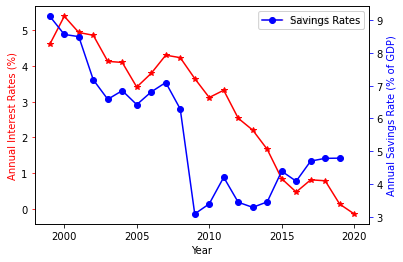

In [161]:
# Goofing around
fig, ax = plt.subplots()
ax.plot(Annual_data.index, Annual_data['Annual Long Term Interest Rates ( in % )'], color= 'red', label= 'Interest Rates', marker= '*')

ax.set_xlabel('Year')
ax.set_ylabel('Annual Interest Rates (%)', color= 'red')
ax.tick_params('y', color= 'red')

ax2= ax.twinx()
ax2.plot(Annual_data.index, Annual_data['Annual Savings rate ( %  GDP)'], color= 'blue', label= 'Savings Rates', marker= 'o')
ax2.set_ylabel('Annual Savings Rate (% of GDP)', color= 'blue')
ax2.tick_params('y', color= 'blue')
ax.legend()
ax2.legend()
plt.show()